In [55]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [56]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )


epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


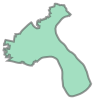

In [57]:
zipcodes.loc[0, 'geometry']

<AxesSubplot:>

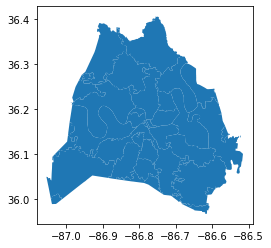

In [58]:
zipcodes.plot()

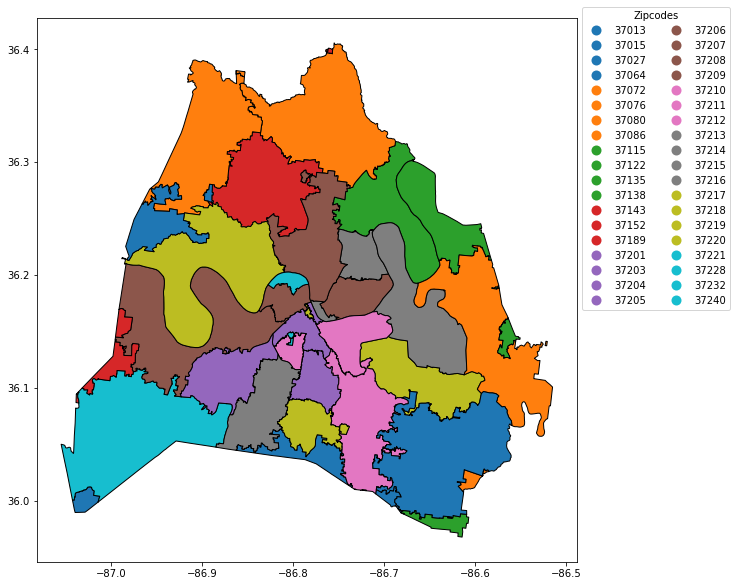

In [59]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds 
              )
plt.show()

In [60]:
parks = pd.read_csv('../data/Park_Locations.csv')

In [61]:
parks.info

<bound method DataFrame.info of                             Park Name   Acres  Year Established  \
0                 Paradise Ridge Park   98.41              2013   
1                 Crooked Branch Park   84.00              2012   
2                        Joelton Park   18.38              1989   
3                          Lytle Farm  615.90              2013   
4         Flora Wilson Community Park    0.35              2012   
..                                ...     ...               ...   
118          Isaac Litton School Park    5.70              1995   
119                        Cedar Hill  321.46              1965   
120                  Shelby Walk Park    0.56              1996   
121                    Charlotte Park   25.24              1964   
122  R. H. Boyd - Preston Taylor Park   11.28              1947   

    Community Center Nature Center Playground ADA Accessible  \
0                Yes            No        Yes            Yes   
1                NaN           NaN 

In [62]:
parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Park Name                        123 non-null    object 
 1   Acres                            123 non-null    float64
 2   Year Established                 123 non-null    int64  
 3   Community Center                 122 non-null    object 
 4   Nature Center                    122 non-null    object 
 5   Playground                       122 non-null    object 
 6   ADA Accessible                   123 non-null    object 
 7   Restrooms Available              123 non-null    object 
 8   Picnic Shelters                  123 non-null    object 
 9   Picnic Shelters Quantity         123 non-null    int64  
 10  Dog Park                         123 non-null    object 
 11  Baseball Fields                  123 non-null    object 
 12  Basketball Courts     

In [63]:
parks['Mapped Location'].str.split('\n', expand=True)

,0,1,2
0,3000 Morgan Rd,"Joelton, TN 37080","(36.335583, -86.85995)"
1,116D Ray Ave,"Lakewood, TN 37138","(36.241016, -86.640834)"
2,21 Joelton Community Center Rd,"Joelton, TN 37080","(36.316932, -86.870111)"
3,1266 Stones River Road,"Hermitage, TN 37076","(36.189647, -86.652059)"
4,Grand Ave at 14th Ave,"Nashville, TN 37212","(36.1461984, -86.789001)"
...,...,...,...
118,4500 Gallatin Pike,"Nashville, TN","(36.228269, -86.725196)"
119,860 West Old Hickory Blvd,"Nashville, TN","(36.268774, -86.753417)"
120,1400 Shelby Ave,"Nashville, TN","(36.170769, -86.746305)"
121,6031 Deal Ave,"Nashville, TN","(36.155785, -86.87042)"


In [64]:
parks.rename(columns = {'2' : 'geometry'})
parks.columns

Index(['Park Name', 'Acres', 'Year Established', 'Community Center',
       'Nature Center', 'Playground', 'ADA Accessible', 'Restrooms Available',
       'Picnic Shelters', 'Picnic Shelters Quantity', 'Dog Park',
       'Baseball Fields', 'Basketball Courts', 'Volleyball', 'Soccer Fields',
       'Football & Multi-purpose Fields', 'Tennis Courts', 'Disc Golf',
       'Skate Park', 'Swimming Pool', 'Spray Park', 'Golf Course',
       'Walk & Jog Paths', 'Hiking Trails', 'Horse Trails',
       'Mountain Bike Trails', 'Boat Launch', 'Camping Available by Permit',
       'Fishing by Permit', 'Lake', 'Canoe Launch', 'Community Garden',
       'Historic Features', 'Notes', 'Mapped Location'],
      dtype='object')

In [65]:
parks_clean = parks.drop(parks.columns.difference(['Park Name','Acres', 'Walk & Jog Paths', 'Hiking Trails', 'geometry']), 1, inplace=True)

C:\Users\tomle\AppData\Local\Temp/ipykernel_21244/3584152454.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  parks_clean = parks.drop(parks.columns.difference(['Park Name','Acres', 'Walk & Jog Paths', 'Hiking Trails', 'geometry']), 1, inplace=True)


In [68]:
parks_clean

In [69]:
parks_geo = gpd.GeoDataFrame(parks_clean, 
                           crs = zipcodes.crs, 
                           geometry = parks_clean['geometry'])

TypeError: 'NoneType' object is not subscriptable